# **Integrating Word2Vec Part2**


This lab continues from **Integrating Word2Vec Part 1**, where you explored Skip-gram and CBOW models, learning how to build and apply them for text classification in PyTorch. You also integrated pretrained GloVe embeddings to enhance the models.

In this lab, an optional section on advanced embedding applications is available for further exploration. By the end, you will have gained proficiency in leveraging word embeddings for various natural language processing (NLP) tasks.


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-required-libraries">Installing required libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing required libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background">Background</a>
        <ol>
            <li><a href="#GloVe-(Optional)">GloVe (Optional)</a></li>
        </ol>
    </li>
    <li>
            <a href="#Applying-pretrained-word-embeddings-(optional)">Applying pretrained word embeddings (optional)</a>
        <ol>
            <li><a href="#Load-Stanford-GloVe-model">Load Stanford GloVe model</a></li>
            <li><a href="#Train-a-word2vec-model-from-gensim">Train a word2vec model from gensim</a></li>
        </ol>
    </li>
    <li><a href="#Text-classification-using-pretrained-word-embeddings">Text classification using pretrained word embeddings</a></li>
</ol>



## Objectives

After completing this lab you will be able to:
- Get pretrained large embedding models and generate word embeddings with them.
- Train a word2vec model on a domain-specific data.


## Setup


For this lab, you will be using the following libraries:

*   [`torch`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for building NN models and preparing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`gensim`](https://pypi.org/project/gensim/) for word2vec pretrained models.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries


This script defines a **utility function**, **"find_similar_words"**, to identify words most similar to a given target word using word embeddings. It computes cosine similarity between word vectors to find the closest matches. This helps in NLP tasks like synonym discovery, word clustering, and semantic analysis.


In [2]:
import numpy as np

def find_similar_words(target_word, embedding_dict, top_k=2):
  if target_word not in embedding_dict:
    return f"{target_word} not found in embeddings."

  print(target_word)

  target_vector = embedding_dict[target_word]
  similarities = {}

  for word, vector in embedding_dict.items():
    if word == target_word:
      continue
      print(word)
      similarity = np.dot(target_vector, vector)/(np.linalg.norm(target_vector) * np.linalg.norm(vector))
      similarities[word] = similarity

  sorted_words = sorted(similarities.items(), key = lambda x: x[1], reverse=True)

  return [word for word, _ in sorted_words[:top_k]]


In [1]:
!pip install numpy==1.26.4
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [2]:
!pip install gensim
!pip install portalocker>=2.0.0
!pip install torch==2.2.2
!pip install torchdata==0.7.1
!pip install torchtext==0.17.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.9 MB/s eta 0:00:00
   ━

### Importing required libraries

_It is recommended that you import all required libraries in one place (here):_


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

from IPython.core.display import display, SVG

from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split

import logging
from gensim.models import Word2Vec
from collections import defaultdict

import torch
import torch.nn as nn

import torch.optim as optim
from torchtext.vocab import GloVe,vocab

from torchdata.datapipes.iter import IterableWrapper, Mapper
from torchtext.datasets import AG_NEWS

from torchtext.data.functional import to_map_style_dataset
from torchtext.data.utils import get_tokenizer
from tqdm import tqdm
# from utils import find_similar_words

%matplotlib inline

def warn(*args, **kwargs):
  pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Background

In this lab session, you'll explore the GloVe model, and an **optional** summary is provided to enhance your understanding of its application in natural language processing.
## GloVe (Optional)



GloVe, on the other hand, is another popular algorithm for learning word embeddings. It stands for Global Vectors for Word Representation. Unlike word2vec, which is based on predicting context/target words, GloVe focuses on capturing the global word co-occurrence statistics from the entire corpus. It constructs a co-occurrence matrix that represents how often words appear together in the text. The matrix is then factorized to obtain the word embeddings. For example, if "Man" and "King" co-occure many times, their vectors will be simialr.

The GloVe model follows a fundamental approach by constructing a large word-context co-occurrence matrix that contains pairs of (word, context). Each entry in this matrix represents the frequency of a word occurring within a given context, which can be a sequence of words. The objective of the model is to utilize matrix factorization techniques to approximate this co-occurrence matrix. The process is illustrated in the following diagram:

1. Create a word-context co-occurrence matrix: The model begins by generating a matrix that captures the co-occurrence information of words and their surrounding contexts. Each element in the matrix represents how often a specific word and context pair co-occur in the training data.

2. Apply matrix factorization: Next, the GloVe model applies matrix factorization methods to approximate the word-context co-occurrence matrix. The goal is to decompose the original matrix into lower-dimensional representations that capture the semantic relationships between words and contexts.

3. Obtain word and context embeddings: By factorizing the co-occurrence matrix, the model obtains word and context embeddings. These embeddings are numerical representations that encode the semantic meaning and relationships of words and contexts.

To accomplish this, you can usually begin by initializing WF (Word-Feature matrix) and FC (Feature-Context matrix) with random weights.You will then perform a multiplication operation between these matrices to obtain WC' (an approximation of WC), and assess its similarity to WC. This process is repeated multiple times using Stochastic Gradient Descent (SGD) to minimize the error(WC'-WC).

Once the training is complete, the resulting Word-Feature matrix (WF) provides you with word embeddings or vector representations for each word(the green vector in the diagram). The dimensionality of the embedding vectors can be predetermined by setting the value of F to a specific number of dimensions, allowing for a compact representation of the word semantics.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/matrix%20fact.png" alt="Co-occurence matrix" class="bg-primary" width="600px">

The key advantage of GloVe is that it can incorporate both global statistics and local context information. This results in word embeddings that not only capture the semantic relationships between words but also preserve certain syntactic relationships.


# Applying pretrained word embeddings (optional)
## Load Stanford GloVe model

Transfer learning, particularly through the use of pretrained word embeddings, serves as a cornerstone in modern NLP. This approach leverages knowledge gleaned from one task, typically learned over massive datasets, and applies it to another, often more specialized task. The primary advantage of this is twofold: it bypasses the need for enormous computational resources to learn from scratch, and it injects a base layer of linguistic understanding into the model. By using embeddings that have already captured complex language patterns and associations, even models with limited exposure to domain-specific data can exhibit remarkably sophisticated behavior, making transfer learning a strategic shortcut to enhanced performance in NLP.


Let's take a look at the pretrained GloVe model from Stanford:


You can specify the model name and embedding dimension: GloVe(name='GloVe_model_name', dim=300)


In **Natural Language Processing (NLP)**, the **embedding dimension** refers to the size of the vector used to represent each word (or token) in a continuous vector space.

---

### 📌 What is a Word Embedding?

Word embeddings are numerical representations of words, where **semantically similar words** have **similar vector representations**. For example:

* "king" might be represented as `[0.3, 0.7, -0.2, ..., 0.1]`
* "queen" as `[0.4, 0.8, -0.1, ..., 0.2]`

These vectors are learned from large text corpora and capture **syntactic and semantic meaning**.

---

### 📐 What is the Embedding Dimension?

The **embedding dimension** is the **number of values in the vector** that represents each word.

* Example: If you're using a 300-dimensional embedding, then each word is represented as a 300-length vector:

  $$
  \text{word vector} \in \mathbb{R}^{300}
  $$

---

### 🤔 Why Does Embedding Dimension Matter?

* **Higher dimensions** → Can capture **more nuanced relationships** but:

  * Need more data to train properly
  * More computationally expensive
  * Risk of overfitting
* **Lower dimensions** → Less expressive, but:

  * Faster
  * Easier to generalize with less data

---

### 🔧 Typical Embedding Sizes

* **GloVe**: 50, 100, 200, or 300 dimensions
* **Word2Vec**: 100–300 dimensions are common
* **BERT/Transformer models**:

  * Embedding size is often 768 (base model) or 1024 (large model)

---

### ⚙️ Where It Appears in Practice

In code (e.g., PyTorch or TensorFlow):

```python
embedding_layer = nn.Embedding(num_embeddings=10000, embedding_dim=300)
```

Here, `embedding_dim=300` sets the embedding dimension.

---

### 🔄 Summary

| Term                | Meaning                                    |
| ------------------- | ------------------------------------------ |
| Embedding           | Vector representing a word or token        |
| Embedding Dimension | Number of elements in the vector           |
| Typical Range       | 50 to 1024 depending on model and use case |

In [84]:
# creating an instance of the 6B version of Glove() model
glove_vectors_6B = GloVe(name='6B')

You must continue with the 6B model as it is lighter. You can load different pretrained GloVe models from torch() using ```torch.nn.Embedding.from_pretrained```.


In the line:

```python
embeddings_Glove6B = torch.nn.Embedding.from_pretrained(glove_vectors_6B.vectors, freeze=True)
```

### 🔒 `freeze=True` means:

The **embedding weights will not be updated** during training. They are **frozen**.

---

### ✅ Why use `freeze=True`?

* You want to **keep the pretrained GloVe embeddings unchanged**.
* Prevents overwriting the semantic information they already contain.
* Useful when training data is limited or when the embeddings are already well-trained.

---

### 🔄 If `freeze=False`:

* The embeddings are **fine-tuned** during training.
* Can help adapt them to a specific task, but might lose general semantic meaning if overtrained.


When you **freeze the embeddings**, **only the embedding layer’s weights stay constant**. The rest of the model (e.g., LSTM, Transformer, classifier layers) **can still be trained** and **will learn from the embeddings**.

---

### 🔁 What’s Actually Happening:

* **Frozen embeddings**: Provide fixed, meaningful word representations from GloVe.
* **Trainable model layers**: Use these embeddings as input to learn how to solve the task (e.g., sentiment analysis, text classification, etc.)

---

### 🧠 Analogy:

Think of frozen embeddings like using a **dictionary** — the word meanings are fixed. But your model is like a **student** using the dictionary to answer questions. The student (model) gets better with training, even though the dictionary (embeddings) doesn’t change.

---

### ✅ When to freeze embeddings:

* When your dataset is **small** (avoids overfitting).
* When using **high-quality pretrained embeddings** like GloVe or fastText.
* When you care more about **general word meaning** than domain-specific nuances.

---

### 🔄 When not to freeze:

* If your dataset is **large and domain-specific** (e.g., medical, legal text).
* If you want the embeddings to **adapt to the task**.

---

### Summary:

| Layer           | Frozen?              | Learns? |
| --------------- | -------------------- | ------- |
| Embedding layer | ✅ (if `freeze=True`) | ❌       |
| Remaining model | ❌                    | ✅       |

So training still happens — just **not in the embedding layer** if it's frozen.


In [85]:
# load the glove model pretrained weights into a PyTorch embedding layer
embeddings_Glove6B = torch.nn.Embedding.from_pretrained(glove_vectors_6B.vectors, freeze=True)

Get ready to look into the embedding vectors of this large pretrained model for the words in the corpus:


You can create an array that returns the index of each word in the GloVe model's vocabulary:


In [86]:
word_to_index = glove_vectors_6B.stoi # Vocabulary index mapping
word_to_index['team']

145

You will get the embedded vector for a word:


In [87]:
embeddings_Glove6B.weight[word_to_index['team']]

tensor([-2.7011e-02,  1.1299e+00,  4.4708e-02, -4.0380e-01, -4.7284e-02,
         9.2736e-02, -2.0715e-01,  2.6137e-01,  2.4730e-01, -8.8769e-01,
         3.1309e-01, -1.4940e-01,  4.9929e-03, -1.1520e-01, -1.7990e-01,
         6.4681e-01,  1.5044e-01, -3.4580e-01,  2.3370e-03, -7.5788e-01,
         1.6048e-01, -2.9066e-02,  1.7194e-01, -4.2799e-02,  3.4297e-02,
        -1.1400e-01, -2.1149e-01,  3.6118e-01, -3.3393e-01, -1.3581e-01,
         1.7858e-01, -2.3381e-01, -8.3367e-02,  1.0626e-01, -1.7301e+00,
         5.2052e-01,  3.7855e-01,  5.5852e-01, -1.0172e-01, -1.8644e-01,
        -1.2096e-01, -5.2009e-02,  1.9565e-01, -1.2685e-01, -3.7493e-01,
         9.7457e-02,  1.7014e-01,  7.7521e-02, -2.1946e-01,  1.4490e-01,
         1.2733e-01, -2.2223e-01, -3.1548e-01,  1.1137e-01, -4.0263e-01,
         8.3553e-01, -7.5475e-03,  3.6725e-01,  1.2324e-02, -1.0033e-01,
        -6.0014e-01,  4.2763e-01, -2.4048e-01, -2.8162e-01,  4.6409e-02,
        -3.7942e-01, -8.0836e-02, -3.2884e-01, -9.3

Let's see how successful the Glove model is in capturing the similarities between words:


In [88]:
# an array of example words
words = [
    "taller",
    "short",
    "black",
    "white",
    "dress",
    "pants",
    "big",
    "small",
    "red",
    "blue",
    "smile",
    "frown",
    "race",
    "stroll",
    "tiny",
    "huge",
    "soft",
    "rough",
    "team",
    "individual"
]

Create a dictionary of words and their embeddings


In [89]:
embedding_dict_Glove6B = {}

for word in words:
  # Get the index of the word from the vocabulary to access its embedding
  embedding_vector = embeddings_Glove6B.weight[word_to_index[word]]
  if embedding_vector is not None:
    # Words not found in the embedding index will be skipped.
    # add the embedding vector of word to the embedding_dict_Glove6B
    embedding_dict_Glove6B[word] = embedding_vector
print(embedding_dict_Glove6B)

{'taller': tensor([-0.3754,  0.3115, -0.8329, -0.4645, -0.0911,  0.6351,  0.2712,  0.7209,
         0.2955, -0.2580, -0.0210,  0.6506,  0.5334,  0.5735, -0.0918, -0.5336,
        -0.2819, -0.3535,  0.1951, -0.4246, -0.1618,  0.4481, -0.0129,  0.6492,
         0.2425,  0.8531,  0.2076, -0.4344,  0.2263,  0.4841,  0.5112,  0.0511,
         0.0074, -0.5669, -0.3787, -0.0809,  0.1811, -0.7922,  0.5570,  0.6542,
        -0.1765,  0.0964, -0.0650, -0.5613, -0.3949,  0.4427,  0.3089,  0.2411,
         0.3372, -0.1780, -0.1744, -0.2347, -0.0224, -0.4414, -0.4013,  0.4173,
        -0.0297, -0.2869,  0.1593, -0.4613, -0.1457, -0.2547, -0.0517, -0.0718,
         0.1289,  0.1005,  0.2856,  0.0267,  0.0631, -0.0833,  0.2289,  0.3972,
        -0.6216, -0.1166, -0.1255,  0.2723, -0.2424, -0.1635,  0.0404,  0.3058,
        -0.2885,  0.5779,  0.1766, -0.1892, -0.3117,  0.1718,  0.3638,  0.2623,
         0.2978,  0.2612,  0.5626, -0.4134,  0.6519,  0.7367, -0.9597, -0.5176,
        -0.6679, -0.4564,  0.

Now that you have loaded the pretrained embeddings for the sample words, let's check if the model can capture the similarity of words by finding the distance between words:


In [90]:
import numpy as np

def find_similar_words(target_word, embedding_dict, top_k=2):
    if target_word not in embedding_dict:
        return f"Word '{target_word}' not found in embeddings."

    target_vector = embedding_dict[target_word]
    similarities = {}

    for word, vector in embedding_dict.items():
        if word == target_word:
            continue
        similarity = np.dot(target_vector, vector) / (np.linalg.norm(target_vector) * np.linalg.norm(vector))
        similarities[word] = similarity

    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return [word for word, _ in sorted_words[:top_k]]

In [91]:
# Call the function to find similar words
target_word = "small"
top_k=2
similar_words = find_similar_words(target_word, embedding_dict_Glove6B, top_k)

# Print the similar words
print("{} most similar words to {}:".format(top_k,target_word) ,similar_words)

2 most similar words to small: ['tiny', 'big']


It can be seen the pretrained GloVe model does quite good job capturing the similarity of words.


# Train a word2vec model from gensim

Here's a simple hands-on exercise to train a word2vec model using `gensim` library.
In this example, you have a small corpus consisting of four sentences.

### Prepare your corpus:


In [92]:
sentences = [
    ["I", "like", "to", "eat", "pizza"],
    ["Pizza", "is", "my", "favorite", "food"],
    ["I", "enjoy", "eating", "Pasta"],
]

In [93]:
sentences = [[word.lower() for word in sentence] for sentence in sentences]
print(sentences)

[['i', 'like', 'to', 'eat', 'pizza'], ['pizza', 'is', 'my', 'favorite', 'food'], ['i', 'enjoy', 'eating', 'pasta']]


The `size` parameter specifies the dimensionality of the word embeddings (in this case, 100). The `window` parameter determines the size of the context window. The `min_count` parameter sets the minimum frequency of a word to be included in the training process. Finally, the `workers` parameter controls the number of threads used for training.


In [94]:
from gensim.models import word2vec

# Create an instance of Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=3, min_count=1, workers=4)

Create vocab from sentences:


In the line:

```python
w2v_model.build_vocab(sentences, progress_per=10000)
```

### 🧾 `progress_per=10000` means:

The model will **print progress updates** every **10,000 sentences** while building the vocabulary.

---

### 🛠️ Purpose:

* Helps track progress during **vocab building**, especially with large datasets.
* Useful for debugging or monitoring long-running processes.

---

### ✅ Example:

If you have 100,000 sentences and `progress_per=10000`, you'll see 10 progress updates like:

```
PROGRESS: at sentence #10000, processed 120000 words...
```

---

**Note:** This parameter is specific to **Gensim's Word2Vec** (or similar models), not PyTorch or TensorFlow.


In [95]:
w2v_model.build_vocab(sentences, progress_per=1000)

Train the model:


In [96]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(55, 420)

That's it! You've trained a word2vec model using the `gensim` library. You can now access the word embeddings using `model.wv` and explore various operations such as finding similar words, calculating word similarities, and more.


Use the trained model to find similar words to "pizza" and calculate the similarity between "pizza" and "pasta".


In [97]:
# Finding similar words
similar_words = w2v_model.wv.most_similar("pizza")
print("Similar words to 'pizza':", similar_words)

Similar words to 'pizza': [('to', 0.17027318477630615), ('is', 0.13898280262947083), ('my', 0.035433270037174225), ('like', 0.00451968889683485), ('pasta', -0.005902299657464027), ('i', -0.027743974700570107), ('favorite', -0.028113720938563347), ('eat', -0.04430948570370674), ('food', -0.06873457878828049), ('enjoy', -0.1732126623392105)]


In [98]:
# Calculating word similarity
similarity = w2v_model.wv.similarity("pizza", "pasta")
print("Similarity between 'pizza', and 'pasta':", similarity)

Similarity between 'pizza', and 'pasta': -0.00590231


The word embeddings obtained from the model would be more meaningful and informative with larger and more diverse training data.


Use the trained model to create a PyTorch embedding layer (just like what you did with the pretrained GloVe model) and use it in any task as an embedding layer.


In [99]:
# Extract word vectors and create word-to-index mapping
word_vectors = w2v_model.wv

# a dictionary to map words to their index in vocab
word_to_index = {word : index for index, word in enumerate(word_vectors.index_to_key)}

# Create an instance of nn.Embedding and load it with the trained vectors
embedding_dim = w2v_model.vector_size
embedding = torch.nn.Embedding(len(word_vectors.index_to_key), embedding_dim)
embedding.weight.data.copy_(torch.from_numpy(word_vectors.vectors))

# Example usage: get the embedding for a word
word = "pizza"
word_index = word_to_index[word]
word_embedding = embedding(torch.LongTensor([word_index]))
print(f"Word: {word}, Embedding: {word_embedding.detach().numpy()}")

Word: pizza, Embedding: [[-0.00714092  0.00124133 -0.00717793 -0.00224098  0.00372044  0.00583255
   0.00120101  0.00210401 -0.00411258  0.00722417 -0.00630454  0.00464709
  -0.00821901  0.00203745 -0.00497656 -0.00424712 -0.00310588  0.00565446
   0.00579693 -0.00497813  0.00077411 -0.00849433  0.00781365  0.00925739
  -0.00274148  0.00080058  0.00074548  0.00547892 -0.00860763  0.00058273
   0.00687327  0.00223279  0.0011247  -0.00932057  0.00847972 -0.00626165
  -0.00299271  0.00349315 -0.0007744   0.00141046  0.00178483 -0.00682816
  -0.00972361  0.00903822  0.00620081 -0.00691076  0.00340142  0.0002056
   0.00475387 -0.00712     0.00402757  0.0043473   0.00995535 -0.0044746
  -0.00139121 -0.00732087 -0.00969911 -0.00908164 -0.00102246 -0.00650654
   0.0048497  -0.00616394  0.00252445  0.00073935 -0.00339426 -0.0009791
   0.0099768   0.00914695 -0.00446548  0.00908081 -0.00564203  0.00593325
  -0.00309734  0.00343278  0.00301738  0.00689681 -0.00237353  0.00877608
   0.00758863 -0.

# Text classification using pretrained word embeddings

You are ready to use the embeddings in a task, then. Let's use the pretrained embeddings to classify text data into topics:


First, you must build vocab from the pretrained GloVe:


In [100]:
from torchtext.vocab import GloVe, vocab

# Build vocab from glove_vectors
# vocab(ordered_dict: Dict, min_freq: int = 1, specials: Optional[List[str]] = None)
vocab = vocab(glove_vectors_6B.stoi, 0, specials = ('<unk>', '<pad>'))
vocab.set_default_index(vocab["<unk>"])

In [101]:
vocab(["<unk>", "Hello", "hello"])

[0, 0, 13077]

Next, you need to tokenize text. For this you can use pretrained tokenizers from torch:


In [102]:
# Define tokenizer
tokenizer = get_tokenizer("basic_english")

Create splits from AG_NEWS() dataset for training, validation and test:


In [103]:
# Split the dataset into training and testing iterators.
train_iter, test_iter = AG_NEWS()

# Convert the training and testing iterators to map-style datasets.
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(train_dataset)*0.85)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
split_train_, split_valid_ = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

Define the class labels:


In [104]:
# define class labels
ag_news_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tec"}

In [105]:
num_class = len(set([label for (label, text) in train_iter]))

In [106]:
num_class

4

Collate data in batches:


In [107]:
def text_pipeline(x):
    x=x.lower()# you need this as your vocab is in lower case
    return vocab(tokenizer(x))

In [108]:
def label_pipeline(x):
  return int(x) - 1

In [109]:
# create label, text and offset for each batch of data
# text is the concatenated text for all text data in the batch
# you need to have the offsets(the end of text index) for later when you separate texts and predict their label
def collate_batch(batch):
  label_list, text_list, offsets = [], [], [0]

  for _label, _text in batch:
    label_list.append(label_pipeline(_label))
    processed_text =  torch.tensor(text_pipeline(_text), dtype=torch.int64)
    text_list.append(processed_text)
    offsets.append(processed_text.size(0))

  label_list = torch.tensor(label_list, dtype=torch.int64)
  offsets = torch.tensor(offsets).cumsum(dim=0)
  text_list = torch.cat(text_list)

  return label_list.to(device), text_list.to(device), offsets.to(device)

Create data loaders for train, validation and test splits:


In [110]:
BATCH_SIZE=64

In [111]:
train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

In [113]:
label, text, offsets = next(iter(train_dataloader))
print(label, text, offsets)
label.shape, text.shape, offsets.shape

tensor([2, 2, 0, 2, 3, 2, 1, 2, 1, 3, 3, 2, 1, 3, 3, 0, 1, 0, 1, 3, 1, 0, 3, 0,
        3, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 2, 3, 3, 0, 2, 3, 1, 2, 1, 1, 0, 3, 3,
        0, 1, 3, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 3, 0]) tensor([7321,   84,    6,  ...,   15,  187,    4]) tensor([   0,   39,   84,  130,  164,  216,  253,  302,  345,  391,  426,  470,
         512,  546,  591,  632,  711,  742,  785,  829,  884,  914,  949,  984,
        1015, 1069, 1106, 1142, 1280, 1320, 1362, 1411, 1457, 1508, 1536, 1576,
        1623, 1662, 1810, 1850, 1916, 1953, 1985, 2075, 2104, 2143, 2186, 2221,
        2271, 2316, 2354, 2400, 2440, 2491, 2542, 2579, 2633, 2661, 2707, 2740,
        2783, 2834, 2865, 2896, 2957])


(torch.Size([64]), torch.Size([2957]), torch.Size([65]))

Create the classifier model:


Here's a **simple explanation** of your `TextClassificationModel` class for a **newbie** in PyTorch:

---

### 🔍 What is it?

This is a **text classification model** — it takes in a piece of text (like a sentence), and tries to **predict a label** for it (e.g., spam or not spam, positive or negative, etc.).

It uses **pre-trained word embeddings** from **GloVe** to understand the meaning of words.

---

### 🧱 What's inside the model?

1. **`self.embedding`**

   * Turns each word into a vector using **pretrained GloVe embeddings**.
   * `freeze=True` means we **don’t update** these vectors during training.

2. **`self.fc` (fully connected layer)**

   * A simple linear layer that maps the averaged word vector to a prediction.
   * `embed_dim` = size of word vectors; `num_class` = number of labels.

3. **`init_weights()`**

   * Initializes weights to small random values (and biases to zero).
   * Helps the model start with reasonable values.

---

### ⚙️ How it works (`forward()` method):

1. **Input:**

   * `text`: a long list of word indices from all texts (sentences) in the batch.
   * `offsets`: positions in `text` where each sentence starts.

2. **Steps:**

   * `self.embedding(text)` converts words into vectors.
   * Then, for each sentence:

     * It finds the words for that sentence using `offsets`.
     * It **averages the word vectors** to get one vector per sentence.

3. **Final step:**

   * The average vector is passed through the linear layer (`fc`) to get predictions.

---

### ✨ In plain words:

> The model reads each sentence, understands the meaning of its words using GloVe embeddings, averages those meanings, and makes a prediction like "positive" or "negative".

---

In [114]:
class TextClassificationModel(nn.Module):
  def __init__(self, vocab_size, embed_dim, num_class):
    super(TextClassificationModel, self).__init__()
    self.embedding = torch.nn.Embedding.from_pretrained(glove_vectors_6B.vectors, freeze=True)
    self.fc = nn.Linear(embed_dim, num_class)
    self.init_weights()

  def init_weights(self):
    initrange=0.5
    self.embedding.weight.data.uniform_(-initrange, initrange)
    self.fc.weight.data.uniform_(-initrange, initrange)
    self.fc.bias.data.zero_()

  def forward(self, text, offsets):
    embedded = self.embedding(text)
    # you get the average of word embeddings in the text
    means = []
    for i in range(1, len(offsets)):
      text_tmp = embedded[offsets[i-1]:offsets[i]]
      means.append(text_tmp.mean(0))

    return self.fc(torch.stack(means))

Define an evaluate function to calculate the accuracy of model:


In [115]:
def evaluate(dataloader):
  model.eval()
  total_acc, total_count = 0, 0

  with torch.no_grad():
    for idx, (label, text, offsets) in enumerate(dataloader):
      predicted_label = model(text, offsets)

      total_acc += (predicted_label.argmax(1) == label).sum().item()
      total_count += label.size(0)

  return total_acc/total_count

Create an instance of the model and check its prediction power before training:


In [116]:
# Define hyperparameters
vocab_size = len(vocab)
embedding_dim = 300
# Initialize the model
model = TextClassificationModel(vocab_size, embedding_dim, num_class).to(device)

In [118]:
evaluate(test_dataloader)

0.2557894736842105

Not good! Let's train the model:


In [119]:
def train_TextClassification(model,dataloader,criterion,optimizer,epochs=10):

    cum_loss_list=[]
    acc_epoch=[]
    acc_old=0

    for epoch in tqdm(range(1, EPOCHS + 1)):
        model.train()
        cum_loss=0
        for idx, (label, text, offsets) in enumerate(train_dataloader):
            means = []
            optimizer.zero_grad()


            predicted_label = model(text, offsets)

            loss = criterion(predicted_label, label)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
            optimizer.step()
            cum_loss+=loss.item()

        print(cum_loss/len(train_dataloader))
        cum_loss_list.append(cum_loss/len(train_dataloader))
        accu_val = evaluate(valid_dataloader)
        print(accu_val)
        acc_epoch.append(accu_val)

        if accu_val > acc_old:
          acc_old= accu_val
          torch.save(model.state_dict(), 'my_model.pth')

    return model,cum_loss_list,acc_epoch

In [120]:
# Define hyperparameters
LR=0.1
EPOCHS=10

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model, cum_loss_list, acc_epoch = train_TextClassification(model, train_dataloader, criterion, optimizer, EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]

1.3340139033803378
0.44816666666666666


 10%|█         | 1/10 [00:27<04:07, 27.56s/it]

1.2268108530355666
0.5327222222222222


 20%|██        | 2/10 [00:44<02:51, 21.44s/it]

1.1560439447237827
0.5703333333333334


 30%|███       | 3/10 [01:02<02:18, 19.82s/it]

1.1027557368634486
0.5964444444444444


 40%|████      | 4/10 [01:20<01:54, 19.11s/it]

1.0612701692126476
0.6167777777777778


 50%|█████     | 5/10 [01:37<01:32, 18.43s/it]

1.0284058854750437
0.6281111111111111


 60%|██████    | 6/10 [01:55<01:12, 18.16s/it]

1.0015672590382574
0.6374444444444445


 70%|███████   | 7/10 [02:23<01:03, 21.25s/it]

0.9794434735661319
0.6435555555555555


 80%|████████  | 8/10 [02:40<00:39, 19.95s/it]

0.9608542786413334
0.6506666666666666


 90%|█████████ | 9/10 [02:58<00:19, 19.36s/it]

0.9450794564959695
0.6562777777777777


100%|██████████| 10/10 [03:25<00:00, 20.58s/it]


In [121]:
import matplotlib.pyplot as plt
def plot(COST, ACC):
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(COST, color=color)
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('total_loss', color=color)
  ax1.tick_params(axis='y', color=color)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color)
  ax2.plot(ACC, color=color)
  ax2.tick_params(axis='y', color=color)
  fig.tight_layout()

  plt.show()

In [123]:
print(cum_loss_list)

[1.3340139033803378, 1.2268108530355666, 1.1560439447237827, 1.1027557368634486, 1.0612701692126476, 1.0284058854750437, 1.0015672590382574, 0.9794434735661319, 0.9608542786413334, 0.9450794564959695]


In [124]:
print(acc_epoch)

[0.44816666666666666, 0.5327222222222222, 0.5703333333333334, 0.5964444444444444, 0.6167777777777778, 0.6281111111111111, 0.6374444444444445, 0.6435555555555555, 0.6506666666666666, 0.6562777777777777]


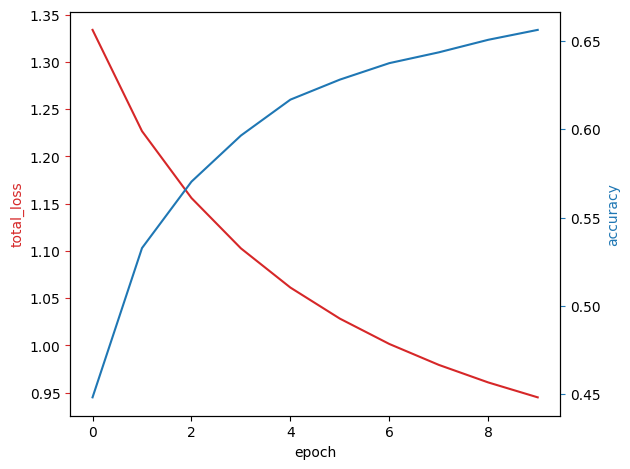

In [125]:
plot(cum_loss_list, acc_epoch)

Finally, evaluate the model on test data:


In [126]:
evaluate(test_dataloader)

0.6444736842105263